In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.drop(['Customer','Effective To Date'],axis=1,inplace=True)

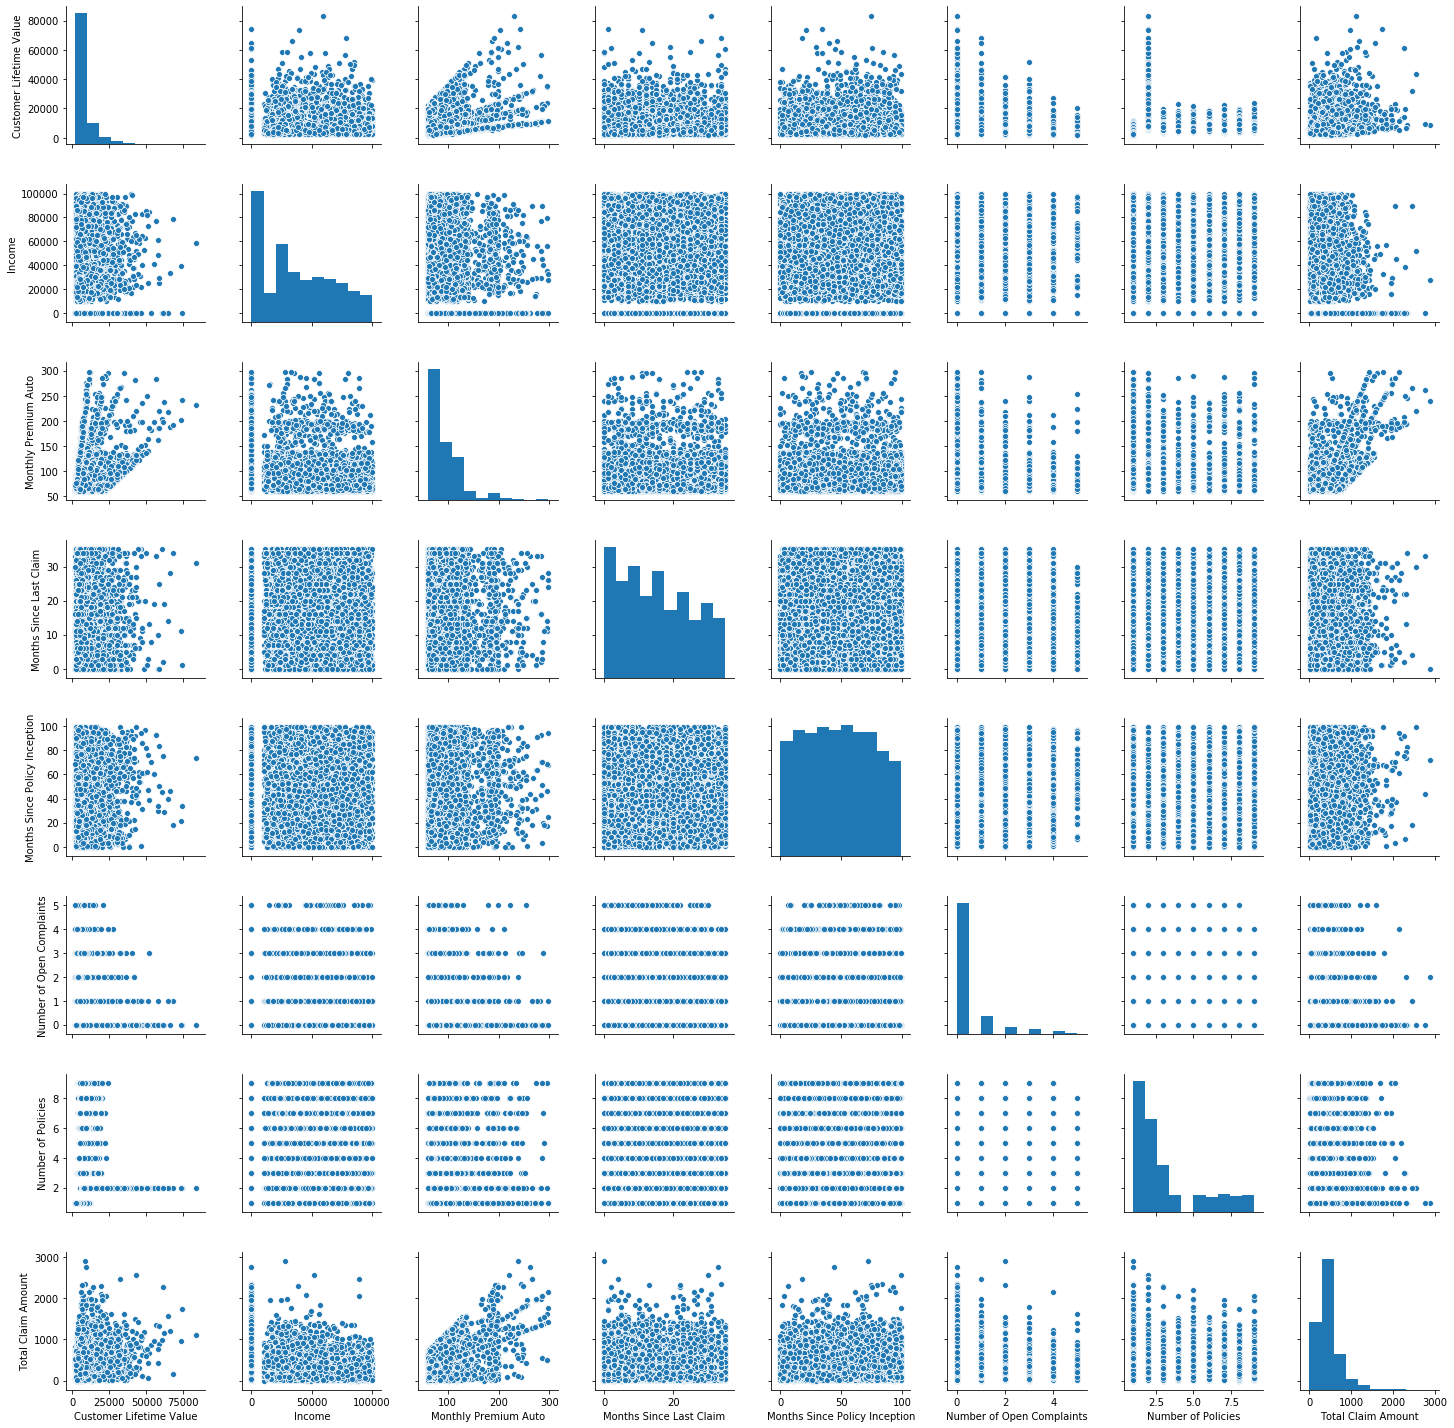

In [5]:
sns.pairplot(data)

In [6]:
data.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
for x in data.columns:
    if len(x.split(' '))>1:
        a=x.split(' ')
        b=str.join('_',a)
        data.rename(columns={x:b})

In [8]:
data.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
x=data.select_dtypes('object')
print(x.columns)

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [13]:
data[x.columns]=data[x.columns].apply(le.fit_transform)

In [14]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


### POLYNOMIAL REGRESSION WITH DEGREE 2

In [15]:
pf=PolynomialFeatures(degree=2)

In [16]:
X=data.drop('Customer Lifetime Value',axis=1)
y=data['Customer Lifetime Value']

In [17]:
X_poly=pf.fit_transform(X)

In [18]:
X_poly=pd.DataFrame(X_poly)

In [19]:
X_poly.shape

(9134, 253)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.30,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr.score(X_train,y_train)

0.28049765259679005

In [26]:
lr.score(X_test,y_test)

0.2218962809612769

### POLYNOMIAL REGRESSION WITH DEGREE 3

In [27]:
pf=PolynomialFeatures(degree=3)

In [28]:
X=data.drop('Customer Lifetime Value',axis=1)
y=data['Customer Lifetime Value']

In [29]:
X_poly=pf.fit_transform(X)

In [30]:
X_poly=pd.DataFrame(X_poly)

In [31]:
X_poly.shape

(9134, 2024)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.30,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr=LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lr.score(X_train,y_train)

0.5286793449892419

In [38]:
lr.score(X_test,y_test)

0.02764201945277056

### FEATURE SELECTION BASED ON P_VALUES AFTER POLYNOMIAL REGRESSION WITH DEGREE 2

In [39]:
X=data.drop('Customer Lifetime Value',axis=1)
y=data['Customer Lifetime Value']

In [40]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X_poly)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.531
Model:                                 OLS   Adj. R-squared:                  0.502
Method:                      Least Squares   F-statistic:                     18.46
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             11:55:26   Log-Likelihood:                -90206.
No. Observations:                     9134   AIC:                         1.815e+05
Df Residuals:                         8606   BIC:                         1.852e+05
Df Model:                              527                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             10.0587      6.942      1.449      0.147      -3.549      23.666
1             15.1539      9.634      1.573      0.116      -3.731      34.039
2             -0.1107      3.021     -0.037      0.971      -6.032       5.810
3             -3.0883      4.167     -0.741      0.459     -11.257       5.080
4             14.3389      9.387      1.528      0.127      -4.061      32.739
5              3.7250      5.178      0.719      0.472      -6.426      13.876
6             10.9434      3.557      3.076      0.002       3.970      17.917
7             -0.0057      0.138     -0.041      0.967      -0.275       0.264
8              0.1465      4.379      0.033      0.973      -8.437       8.730
9             15.8433      4.813      3.292      0.001       6.409      25.278
10           158.5056     73.288      2.163      0.031      14.844     302.168
11            13.7898     29.724      0.464      0.643     -44.477      72.056
12          -159.6472    103.608     -1.541      0.123    -362.743      43.449
13            -4.4263      4.084     -1.084      0.278     -12.432       3.579
14           -57.8169     12.243     -4.723      0.000     -81.815     -33.819
15             0.7915      3.928      0.201      0.840      -6.908       8.491
16            31.0267     13.944      2.225      0.026       3.692      58.361
17            26.1356      6.542      3.995      0.000      13.312      38.959
18            23.7162      6.549      3.621      0.000      10.878      36.555
19           -15.8272     13.102     -1.208      0.227     -41.509       9.855
20            -2.0558      3.184     -0.646      0.518      -8.297       4.185
21             9.9722      5.012      1.990      0.047       0.147      19.798
22             8.3198     25.100      0.331      0.740     -40.882      57.522
23             7.3852     10.984      0.672      0.501     -14.147      28.917
24           -23.3161     13.922     -1.675      0.094     -50.607       3.975
25            22.7355     23.533      0.966      0.334     -23.395      68.866
26            -5.1058     13.401     -0.381      0.703     -31.375      21.163
27           -10.4233     14.307     -0.729      0.466     -38.469      17.622
28            -0.0045      0.018     -0.250      0.802      -0.040       0.031
29            13.8163     18.938      0.730      0.466     -23.307      50.939
30           -25.5255     15.611     -1.635      0.102     -56.128       5.077
31           -30.7740     14.918     -2.063      0.039     -60.018      -1.531
32            50.7015     35.360      1.434      0.152     -18.612     120.015
33            29.3143     13.163      2.227      0.026       3.511      55.117
34           -26.2500     15.224     -1.724      0.085     -56.094       3.594
35           214.8570    1

In [41]:
x_poly_pvalue=lin_reg.pvalues[lin_reg.pvalues<0.05]

In [42]:
x_poly_pvalue.index

Int64Index([   6,    9,   10,   14,   16,   17,   18,   21,   31,   33,
            ...
            1947, 1967, 1968, 1969, 1990, 1993, 1994, 2005, 2010, 2021],
           dtype='int64', length=307)

In [43]:
X=X_poly[x_poly_pvalue.index]

In [44]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.441
Model:                                 OLS   Adj. R-squared:                  0.422
Method:                      Least Squares   F-statistic:                     23.60
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             11:55:28   Log-Likelihood:                -91006.
No. Observations:                     9134   AIC:                         1.826e+05
Df Residuals:                         8838   BIC:                         1.847e+05
Df Model:                              295                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.143e+04   1420.139     -8.045      0.000   -1.42e+04   -8641.271
6              9.7711    144.066      0.068      0.946    -272.632     292.174
9           1029.4520    555.340      1.854      0.064     -59.143    2118.048
10            67.4042     18.290      3.685      0.000      31.551     103.257
14            1.1e+04    592.666     18.555      0.000    9834.899    1.22e+04
16          -181.9867    435.207     -0.418      0.676   -1035.093     671.119
17           128.6416    276.623      0.465      0.642    -413.603     670.886
18            14.9372    419.440      0.036      0.972    -807.262     837.137
21          -358.4147    520.128     -0.689      0.491   -1377.987     661.158
31            -4.7001      3.090     -1.521      0.128     -10.758       1.358
33            10.6678      6.502      1.641      0.101      -2.078      23.414
38           102.9676    115.569      0.891      0.373    -123.575     329.510
42          -169.1359    129.151     -1.310      0.190    -422.301      84.029
49          1335.0575    765.758      1.743      0.081    -166.006    2836.121
51            33.0393      9.218      3.584      0.000      14.971      51.108
52           -58.9483     42.369     -1.391      0.164    -142.001      24.105
53          -103.1271     14.599     -7.064      0.000    -131.745     -74.509
54          1043.1842    357.275      2.920      0.004     342.842    1743.526
58          -166.2982    447.913     -0.371      0.710   -1044.312     711.716
59          1111.2018    393.034      2.827      0.005     340.763    1881.640
61           405.7081    590.643      0.687      0.492    -752.090    1563.506
77           116.5775    370.913      0.314      0.753    -610.499     843.654
78           394.6949    365.733      1.079      0.281    -322.226    1111.616
88            -0.5811      1.284     -0.453      0.651      -3.097       1.935
90             6.2876      2.674      2.352      0.019       1.047      11.528
91           -14.9586    128.488     -0.116      0.907    -266.825     236.908
99             2.1950     95.861      0.023      0.982    -185.715     190.105
101         -136.6588    103.071     -1.326      0.185    -338.702      65.385
104         -234.2843    413.156     -0.567      0.571   -1044.165     575.597
110         1916.7610    514.311      3.727      0.000     908.591    2924.931
114            1.4671      0.361      4.062      0.000       0.759       2.175
117            9.7768    144.065      0.068      0.946    -272.625     292.178
131          -99.3436     53.574     -1.854      0.064    -204.360       5.673
140            0.0012      0.004      0.326      0.745      -0.006       0.008
153          -81.2649    115.203     -0.705      0.481    -307.089     144.559
159           -3.2389     

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.4474661589973664
0.39207341327698686


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9401555472544862
0.6902916564183644


### APPLY PCA TO POLYNOMIAL REGRESSION FEATURES

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca=PCA()

In [50]:
pca.fit(X_poly)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
pca.explained_variance_ratio_

array([9.99987918e-01, 1.16920751e-05, 1.94915395e-07, ...,
       1.43651293e-35, 1.22230975e-38, 1.37693489e-40])

In [52]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99998792, 0.99999961, 0.9999998 , ..., 1.        , 1.        ,
       1.        ])

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
X_p=pca.fit_transform(X_poly)

In [54]:
X_p

array([[ 1.25103734e+13,  3.93796805e+11, -1.13087100e+11, ...,
         6.39927940e+10,  1.65464305e+09, -8.63773936e+09],
       [-1.65699218e+14, -2.40529585e+11, -3.65433654e+10, ...,
        -7.75486460e+09,  7.32773155e+08, -9.33887382e+08],
       [-4.97165176e+13,  7.35340458e+11,  1.15057961e+10, ...,
         1.40813337e+10, -3.89933230e+08, -4.19778225e+09],
       ...,
       [-1.65699218e+14, -2.40529808e+11, -3.65431059e+10, ...,
        -7.75419243e+09,  7.09316107e+08, -9.70631461e+08],
       [-1.55135579e+14,  5.96427706e+10, -3.69145013e+10, ...,
         6.12235905e+09,  2.81043901e+09,  4.36438024e+09],
       [-1.65699218e+14, -2.40529912e+11, -3.65429850e+10, ...,
        -7.75387863e+09,  6.98366958e+08, -9.87782231e+08]])

In [55]:
X_p=pd.DataFrame(X_p)

In [57]:
X_p

,0,1,2,3,4,5,6
0,1.251037e+13,3.937968e+11,-1.130871e+11,3.053366e+10,6.399279e+10,1.654643e+09,-8.637739e+09
1,-1.656992e+14,-2.405296e+11,-3.654337e+10,-1.072369e+10,-7.754865e+09,7.327732e+08,-9.338874e+08
2,-4.971652e+13,7.353405e+11,1.150580e+10,2.246038e+10,1.408133e+10,-3.899332e+08,-4.197782e+09
3,-1.656992e+14,-2.405299e+11,-3.654301e+10,-1.072401e+10,-7.753949e+09,7.008239e+08,-9.839347e+08
4,-8.146363e+13,-2.459257e+11,3.017625e+10,1.110648e+10,9.389452e+08,1.323148e+09,-1.753113e+09
...,...,...,...,...,...,...,...
9129,2.066337e+14,-4.317874e+11,1.919553e+11,-1.499150e+11,3.130591e+10,4.287047e+09,3.280595e+08
9130,-1.556154e+14,-9.469169e+10,-2.321911e+10,-3.180799e+09,-3.379469e+09,1.039828e+09,-3.257536e+08
9131,-1.656992e+14,-2.405298e+11,-3.654311e+10,-1.072392e+10,-7.754192e+09,7.093161e+08,-9.706315e+08
9132,-1.551356e+14,5.964277e+10,-3.691450e+10,1.444597e+09,6.122359e+09,2.810439e+09,4.364380e+09


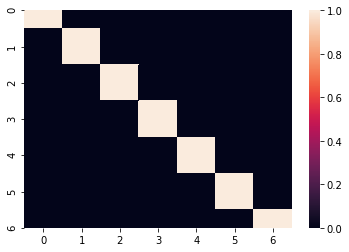

In [58]:
sns.heatmap(X_p.corr())

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_p,y,test_size=0.30,random_state=0)

In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.08503833059297472
0.06849901881963094


In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.8592836344750935
0.2223770467841556
